This file is for showing enhancing and knockout strategies.


In [119]:
from cobra import Reaction, Metabolite
from cobra.io import read_sbml_model
from cobra.io import write_sbml_model
import cameo
from cameo import phenotypic_phase_plane
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
from cameo.strain_design.heuristic.evolutionary_based import OptGene

In [120]:
from cameo import models
from cameo import load_model

In [121]:
opt_model = read_sbml_model('Models/model_VN_LB_vio-fad.xml')

In [122]:
print("Maximal growth rate of Vibrio natriegens in LB medium:", round(opt_model.optimize().objective_value, 3))

Maximal growth rate of Vibrio natriegens in LB medium: 10.0


In [123]:
with opt_model:
    
    ratio = opt_model.problem.Constraint(
    1.9*opt_model.reactions.Violacein.flux_expression - 1*opt_model.reactions.Deoxyviolacein.flux_expression,
    lb=0, ub=0)
    opt_model.add_cons_vars(ratio)
    
    solution = opt_model.optimize()
    growth = solution.objective_value
    
    # The new model including violacein pathway with FAD is stored in Models folder.
    # The model is saved before adding violacein as objective.
    write_sbml_model(opt_model,"Models/model_VN_LB_vio-fad.xml")
    
    opt_model.objective = opt_model.reactions.Violacein
    solution = opt_model.optimize()
    
    print('Max. violacein production in LB media [mmol gDW^-1 h^-1]:', solution.fluxes['Violacein'])
    print('Max. deoxyviolacein production in LB media [mmol gDW^-1 h^-1]:', solution.fluxes['Deoxyviolacein'])
    print('Max. growth rate in LB media [h^-1]:', growth)

Max. violacein production in LB media [mmol gDW^-1 h^-1]: 1.470588235294118
Max. deoxyviolacein production in LB media [mmol gDW^-1 h^-1]: 2.7941176470588243
Max. growth rate in LB media [h^-1]: 4.411764705882353


Checking if the coeeficients would change anything on Violacein produciton rate

In [124]:
with opt_model:
    
    ratio = opt_model.problem.Constraint(
    1.9*opt_model.reactions.Violacein.flux_expression - 1*opt_model.reactions.Deoxyviolacein.flux_expression,
    lb=0, ub=0)
    opt_model.add_cons_vars(ratio)
    
    solution = opt_model.optimize()
    growth = solution.objective_value
    
    # The new model including violacein pathway with FAD is stored in Models folder.
    # The model is saved before adding violacein as objective.
    write_sbml_model(opt_model,"Models/model_VN_LB_vio-fad.xml")
    
    opt_model.objective = opt_model.reactions.Violacein
    solution = opt_model.optimize()
    
    print('Max. violacein production in LB media [mmol gDW^-1 h^-1]:', solution.fluxes['Violacein'])
    print('Max. deoxyviolacein production in LB media [mmol gDW^-1 h^-1]:', solution.fluxes['Deoxyviolacein'])
    print('Max. growth rate in LB media [h^-1]:', growth)
    opt_model.reactions.get_by_id("Protoviolaceinate_VioD").objective_coefficient = 1.0
    opt_model.reactions.get_by_id("Violaceinate").objective_coefficient = 1.0
    opt_model.reactions.get_by_id("Violacein").objective_coefficient = 1.0
    opt_model.reactions.get_by_id("Deoxyviolacein").objective_coefficient = 0.0
    opt_model.reactions.Growth.objective_coefficient = 0.0

    opt_model.objective = opt_model.reactions.Violacein
    solution = opt_model.optimize()
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(solution.fluxes.get('Violacein')))
    print('Deoxyviolacein Production Rate (mmol/gdcw/h): ' + str(solution.fluxes.get('Deoxyviolacein')))
    print('Deoxyviolacein Production Rate (mmol/gdcw/h): ' + str(solution.fluxes.get('Deoxyviolaceinate_VioC')))
    print('Growth Rate (mmol/gdcw/h): ' + str(solution.fluxes.Growth))

Max. violacein production in LB media [mmol gDW^-1 h^-1]: 1.4705882352941175
Max. deoxyviolacein production in LB media [mmol gDW^-1 h^-1]: 2.7941176470588234
Max. growth rate in LB media [h^-1]: 4.411764705882352
Violacein Production Rate (mmol/gdcw/h): 1.4705882352941175
Deoxyviolacein Production Rate (mmol/gdcw/h): 2.7941176470588234
Deoxyviolacein Production Rate (mmol/gdcw/h): 2.7941176470588234
Growth Rate (mmol/gdcw/h): 0.0


In [125]:
with opt_model:
       
    solution = opt_model.optimize()
    growth = solution.objective_value
    
    
    opt_model.objective = opt_model.reactions.Violacein
    solution = opt_model.optimize()
    
    print('Max. violacein production in LB media [mmol gDW^-1 h^-1]:', solution.fluxes['Violacein'])
    print('Max. deoxyviolacein production in LB media [mmol gDW^-1 h^-1]:', solution.fluxes['Deoxyviolacein'])
    print('Max. growth rate in LB media [h^-1]:', growth)
    opt_model.reactions.get_by_id("Protoviolaceinate_VioD").objective_coefficient = 1.0
    opt_model.reactions.get_by_id("Violaceinate").objective_coefficient = 1.0
    opt_model.reactions.get_by_id("Violacein").objective_coefficient = 1.0
    opt_model.reactions.get_by_id("Deoxyviolacein").objective_coefficient = 0.0
    opt_model.reactions.Growth.objective_coefficient = 0.0

    opt_model.objective = opt_model.reactions.Violacein
    solution = opt_model.optimize()
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(solution.fluxes.get('Violacein')))
    print('Deoxyviolacein Production Rate (mmol/gdcw/h): ' + str(solution.fluxes.get('Deoxyviolacein')))
    print('Deoxyviolacein Production Rate (mmol/gdcw/h): ' + str(solution.fluxes.get('Deoxyviolaceinate_VioC')))
    print('Growth Rate (mmol/gdcw/h): ' + str(solution.fluxes.Growth))

Max. violacein production in LB media [mmol gDW^-1 h^-1]: 3.333333333333333
Max. deoxyviolacein production in LB media [mmol gDW^-1 h^-1]: 0.0
Max. growth rate in LB media [h^-1]: 10.0
Violacein Production Rate (mmol/gdcw/h): 3.333333333333333
Deoxyviolacein Production Rate (mmol/gdcw/h): 0.0
Deoxyviolacein Production Rate (mmol/gdcw/h): 0.0
Growth Rate (mmol/gdcw/h): 0.0


By putting Violacein as the objective, the coefficients needed for the Violacein producton already set to 1.0. and to 0.0 for Deoxyviolacein production. 

FSEOF: 

In [126]:
from cameo.flux_analysis.analysis import phenotypic_phase_plane
from cameo.strain_design.deterministic import DifferentialFVA
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

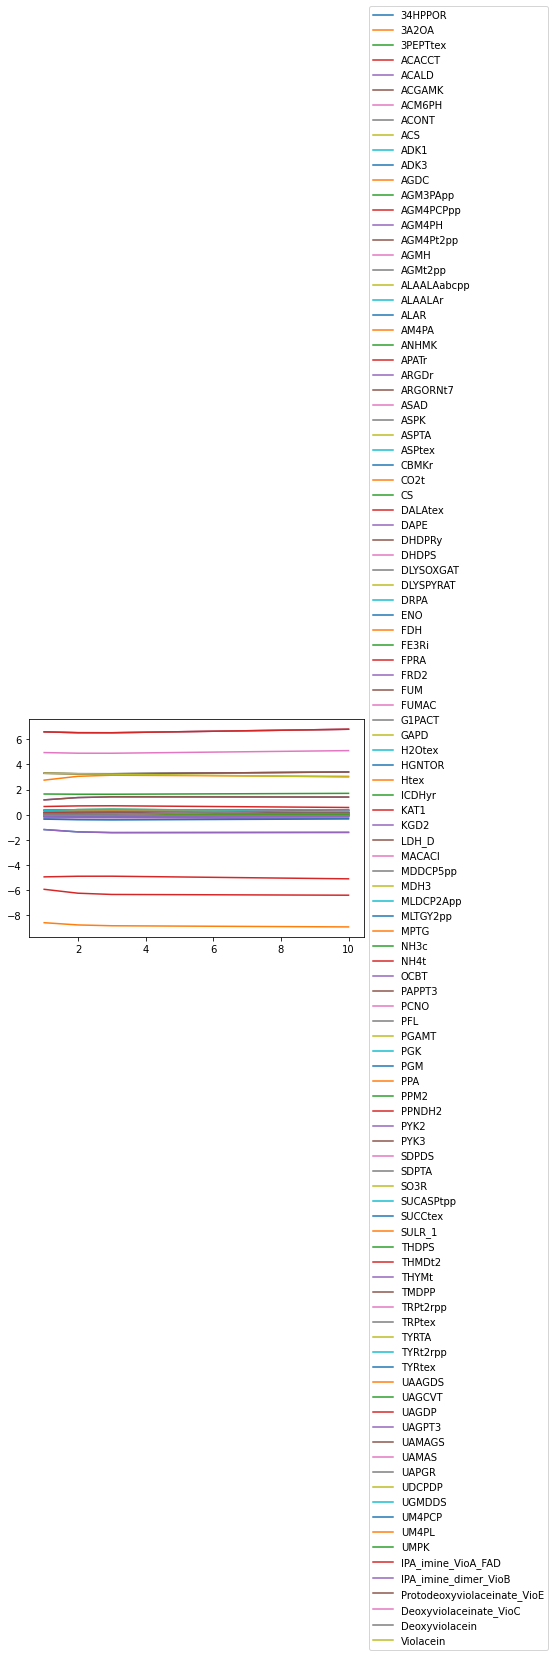

In [127]:
fseof = FSEOF(opt_model)
result_FSEOF = fseof.run(target = opt_model.reactions.Violacein)
df = result_FSEOF.data_frame
from matplotlib import pyplot as plt
result_FSEOF.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [128]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[10] +1
target_reactions_df = df[df['relative_change_in_flux'] > 1.09]
target_reactions_df

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
34HPPOR,0.050000,0.100000,0.118590,0.115385,0.112179,0.108974,0.105769,0.102564,0.099359,0.096154,1.480001
3A2OA,-0.075001,-0.150001,-0.177885,-0.173077,-0.168269,-0.163461,-0.158654,-0.153846,-0.149038,-0.144231,1.479994
3PEPTtex,-0.025000,-0.050000,-0.059295,-0.057692,-0.056090,-0.054487,-0.052885,-0.051282,-0.049679,-0.048077,1.480001
ACACCT,0.050000,0.100000,0.118590,0.115385,0.112179,0.108974,0.105769,0.102564,0.099359,0.096154,1.480001
ACS,0.150001,0.217172,0.237179,0.230769,0.224359,0.217949,0.211538,0.205128,0.198718,0.192308,1.219996
ADK1,0.136366,0.217172,0.237179,0.230769,0.224359,0.217949,0.211538,0.205128,0.198718,0.192308,1.290898
AGM3PApp,0.025000,0.050000,0.059295,0.057692,0.056090,0.054487,0.052885,0.051282,0.049679,0.048077,1.480001
AGM4PCPpp,0.000000,0.020707,0.029647,0.028846,0.028045,0.027244,0.026442,0.025641,0.024840,0.024038,2.000000
AGMH,0.025000,0.050000,0.059295,0.057692,0.056090,0.054487,0.052885,0.051282,0.049679,0.048077,1.480001
AGMt2pp,0.025000,0.050000,0.059295,0.057692,0.056090,0.054487,0.052885,0.051282,0.049679,0.048077,1.480001


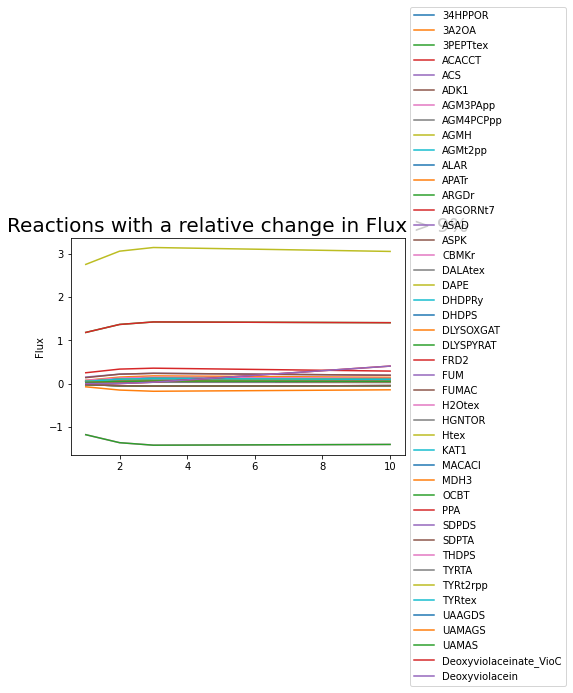

In [129]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)
fig = df.T.plot()
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 9%', size=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [130]:
target_reactions_df.head()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
34HPPOR,0.050000,0.100000,0.118590,0.115385,0.112179,0.108974,0.105769,0.102564,0.099359,0.096154,1.480001
3A2OA,-0.075001,-0.150001,-0.177885,-0.173077,-0.168269,-0.163461,-0.158654,-0.153846,-0.149038,-0.144231,1.479994
3PEPTtex,-0.025000,-0.050000,-0.059295,-0.057692,-0.056090,-0.054487,-0.052885,-0.051282,-0.049679,-0.048077,1.480001
ACACCT,0.050000,0.100000,0.118590,0.115385,0.112179,0.108974,0.105769,0.102564,0.099359,0.096154,1.480001
ACS,0.150001,0.217172,0.237179,0.230769,0.224359,0.217949,0.211538,0.205128,0.198718,0.192308,1.219996


The reactions ARGORNt7 and ARGDr might be good targets to overexpress.

One way to enhance Violacein produciton is to overexpress the reaction VioD catalyzes. []

In [131]:
#Calculate flux from source
#Change lower boundaries to this 
#                1.4705882352941175

In [132]:
with opt_model:
    opt_model.reactions.Protoviolaceinate_VioD.lower_bound = 900
    print(opt_model.reactions.Protoviolaceinate_VioD.lower_bound)
    opt_model.objective = opt_model.reactions.Violacein
    solution = opt_model.optimize()
    
    
    
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(solution.fluxes.get('Violacein')))
    print('Deoxyviolacein Production Rate (mmol/gdcw/h): ' + str(solution.fluxes.get('Deoxyiolacein')))

900
Violacein Production Rate (mmol/gdcw/h): 3.3333333333333335
Deoxyviolacein Production Rate (mmol/gdcw/h): None


C:\Users\Sina Maschek\.conda\envs\carveme\lib\site-packages\cobra\util\solver.py:554: UserWarning:

Solver status is 'infeasible'.



By overexpressing the reaction catalyzed by VioD, the produciton rate of Violacein enhances a bit. Now, we additionally enhance the reaction catalyzed by VioC. The enzyme both catalyzes the last step of the produciton of Violacein and Deoxyviolacein. To simulate that we set the boundaries of both reactions. 

In [133]:
with opt_model:
    opt_model.reactions.Protoviolaceinate_VioD.lower_bound = 900
    print(opt_model.reactions.Protoviolaceinate_VioD.lower_bound)
    opt_model.objective = opt_model.reactions.Violacein
    solution_1 = opt_model.optimize()
    
    opt_model.reactions.Violaceinate.lower_bound = 500
    opt_model.reactions.Deoxyviolaceinate_VioC.lower_bound = 500
    solution_2 = opt_model.optimize()
    
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(solution_1.fluxes.get('Violacein')))
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(solution_2.fluxes.get('Violacein')))



900
Violacein Production Rate (mmol/gdcw/h): 3.3333333333333335
Violacein Production Rate (mmol/gdcw/h): -280.300335149889


The model behaves differently then expected. By raising the lower boundary of reaction of VioD, the production balance of Violacein and Deoxyviolacein is supposed to be pushed towards Violacein. Then, by enhancing VioC, Violacein production is supposed to be enhanced even more. 
The model enhances Violacein production only a little when VioD is overexpressed. When both VioC reactions are overexpressed, the model prioritizes the pathway of Deoxyviolacein and lowers Violacein production.

In [134]:
with opt_model:
    opt_model.reactions.Protoviolaceinate_VioD.lower_bound = 900
    print(opt_model.reactions.Protoviolaceinate_VioD.lower_bound)
    opt_model.objective = opt_model.reactions.Violacein
    solution_1 = opt_model.optimize()
    
    opt_model.reactions.Violaceinate.lower_bound = 500
    opt_model.reactions.Deoxyviolaceinate_VioC.lower_bound = 0
    solution_2 = opt_model.optimize()
    
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(solution_1.fluxes.get('Violacein')))
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(solution_2.fluxes.get('Violacein')))



900
Violacein Production Rate (mmol/gdcw/h): 3.333333333333333
Violacein Production Rate (mmol/gdcw/h): 3.333333333333333


When VioC reaction towards Deoxyviolacein is ignored, the model does not increase Violacein production. 

In [118]:
with opt_model:
    opt_model.reactions.Protoviolaceinate_VioD.lower_bound = 900
    print(opt_model.reactions.Protoviolaceinate_VioD.lower_bound)
    opt_model.objective = opt_model.reactions.Violacein
    solution_1 = opt_model.optimize()
    
    opt_model.reactions.Violaceinate.lower_bound = 900
    opt_model.reactions.Violacein.lower_bound = 900
    opt_model.reactions.Deoxyviolaceinate_VioC.lower_bound = 0
    solution_2 = opt_model.optimize()
    
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(solution_1.fluxes.get('Violacein')))
    print('Violacein Production Rate (mmol/gdcw/h): ' + str(solution_2.fluxes.get('Violacein')))


900
Violacein Production Rate (mmol/gdcw/h): 3.333333333333333
Violacein Production Rate (mmol/gdcw/h): 3.333333333333333


Another way to improve production or growth rates is to knock-out "unnecessary" pathways.

In [ ]:
plotter = PlotlyPlotter()

In [ ]:
wt_solution = opt_model.optimize()
growth = wt_solution.fluxes.Growth
Violacein_production = wt_solution.fluxes["Violacein"]
p = phenotypic_phase_plane(opt_model, variables=['Growth'], objective='Violacein')
p.plot(plotter,points=[(growth, Violacein_production)])

In [ ]:
optgene = OptGene(opt_model)

In [ ]:
result = optgene.run(target="Violacein",
                     biomass= "Growth" ,
                     substrate="glc__D_e",
                     max_evaluations=5000,
                     plot=False)

In [ ]:
result

This tells us that there are no pathways to knockout for optimization. The reason for that might be that not the full model is saved in carveme. Only about 32% of the exisitng coding genes in Vibri natrigens are saved in this model. As those are probably mainly the ones needed for growth, there are no "unnecessary" pathways that we can knock out for optimization.

In [ ]:
print("Percentage of genes included in the model compared to the number of existing coding genes in Vibrio natrigens(4513 genes):",round(((len(opt_model.genes)*100)/4513), 3),"%")

In [ ]:
result = optgene.run(target="Violacein",
                     biomass= "Growth" ,
                     substrate="EX_sucr_e",
                     max_evaluations=5000,
                     plot=False)

In [ ]:
result

Also by using another substrate, the model can not be optimized by knocking out pathways. 